# Zhenfeng Liang

# MTH9875 Homework 10

Assigned: November 5, 2015.
Due: November 19, 2014 by 6pm.

Late homework **will not be accepted**.

<font color = "red">Homework is to be done by each student individually.  To receive full credit, you must email a completed copy of this iPython notebook to Tai-Ho Wang and Jim Gatheral by the due date and time.  All R-code must run correctly and solutions must be written up neatly in Markdown/LaTeX format.

### As usual, set up your R-environment

The following code sources *BlackScholes.R* which has the Black-Scholes formula and implied volatility computation and *Heston2.R* which has in particular the *impvolHeston* function.

In [4]:
download.file(url="http://mfe.baruch.cuny.edu/wp-content/uploads/2014/09/MTH9875_4_rFiles.zip", destfile="rFiles4.zip")
unzip(zipfile="rFiles4.zip")

source("BlackScholes.R")
source("Heston2.R")

## The gamma swap

### 1. (8 points)
$$
\newcommand{\supp}{\mathrm{supp}}
\newcommand{\E}{\mathbb{E} }
\def\Cov{{ \mbox{Cov} }}
\def\Var{{ \mbox{Var} }}
\newcommand{\1}{\mathbf{1} }
\newcommand{\PP}{\mathbb{P} }
%\newcommand{\Pr}{\mathrm{Pr} }
\newcommand{\QQ}{\mathbb{Q} }
\newcommand{\RR}{\mathbb{R} }
\newcommand{\DD}{\mathbb{D} }
\newcommand{\HH}{\mathbb{H} }
\newcommand{\spn}{\mathrm{span} }
\newcommand{\cov}{\mathrm{cov} }
\newcommand{\sgn}{\mathrm{sgn} }
\newcommand{\HS}{\mathcal{L}_{\mathrm{HS}} }
%\newcommand{\HS}{\mathrm{HS} }
\newcommand{\trace}{\mathrm{trace} }
\newcommand{\LL}{\mathcal{L} }
%\newcommand{\LL}{\mathrm{L} }
\newcommand{\s}{\mathcal{S} }
\newcommand{\ee}{\mathcal{E} }
\newcommand{\ff}{\mathcal{F} }
\newcommand{\hh}{\mathcal{H} }
\newcommand{\bb}{\mathcal{B} }
\newcommand{\dd}{\mathcal{D} }
\newcommand{\g}{\mathcal{G} }
\newcommand{\p}{\partial}
\newcommand{\half}{\frac{1}{2} }
\newcommand{\T}{\mathcal{T} }
\newcommand{\bi}{\begin{itemize}}
\newcommand{\ei}{\end{itemize}}
\newcommand{\beq}{\begin{equation}}
\newcommand{\eeq}{\end{equation}}
\newcommand{\beas}{\begin{eqnarray*}}
\newcommand{\eeas}{\end{eqnarray*}}
\newcommand{\cO}{\mathcal{O}}
\newcommand{\cF}{\mathcal{F}}
\newcommand{\cL}{\mathcal{L}}
$$

Assume a stock process of the form

$$
\frac{dS_t}{S_t}=\sigma_t\,dZ_t
$$

where $\sigma_t$ may be stochastic.

A continuous time version of the payoff of a gamma swap is
$
\int_0^T\,S_t\,\sigma_t^2\,dt
$.

(a)

Compute $d(S_t\,\log S_t)$ using Itô's Lemma.

(b)

Deduce the semi-static model-free hedging strategy involving a static hedge in European options and continuous rebalancing in the stock. 

(c) 

Using the spanning formula, derive an expression for the weights of the options in the static hedge.

### Solution

### (a)

We apply ito lemma to $f = S_t\,log\,S_t$

$$
d(S_t\,logS_t) = (log\,S_t + 1)dS_t + \frac12\,\frac{1}{S_t}\,d[S_t]_t = \frac12\,\sigma_t^2\,S_t\,dt + (log\,S_t + 1)dS_t
$$

### (b)

Rearrange the result from part (a) and integrate two side from 0 to T, we have,

\begin{eqnarray}
\int_0^T\,S_t\,\sigma_t^2\,dt &=& 2(S_T\,logS_T - S_0\,logS_0 - (S_T - S_0) - \int_0^T\,logS_t\,dS_t) \\
&=& 2S_T(logS_T - 1) - 2S_0(logS_0 - 1) - 2\int_0^T\,logS_t\,dS_t
\end{eqnarray}

where $A(S_T) = 2S_T(logS_T - 1)$ is the static hedge in European options and $ - 2\int_0^T\,logS_t\,dS_t$ corresponds to the rebalancing of the stock.

### (c)

Our static hedge payoff is, $g(S_T) = 2S_T(logS_T - 1)$

Recall spanning formula, 

$$
g(S_T) =\int_0^F\,g''(K)\,(K-S_T)^+\,dK + \int_F^\infty\,g''(K)\,(S_T-K)^+\,dK\nonumber + g(F)  + g'(F)\,(S_T-F).
$$

where the weight of each option equal to the second derivative of the payoff at the strike price of the option.

Take second derivative of $g(S_T)$, we have,

$$
g''(K) = \frac{2}{K}
$$

## Demonstrate replication path-by-path

### 2. (8 points) 

(a)

Amend (for example) the stochastic volatility and local volatility Monte Carlo codes (*HestonMCxmax* and *HestonLvMCxmax* respectively) from Lecture 10, with the same HN parameters:

$$
\begin{eqnarray*} v&=& 0.04\\ \bar v &=& 0.04\\ \lambda&=&10\\
\eta&=&1\\\rho&=&-1
\end{eqnarray*}
$$

to demonstrate that the 
variance swap hedging strategy outlined on page 136 of *The
Volatility Surface* replicates the variance swap payoff path-by-path independently of the dynamical assumptions.  Assume a 1-year variance swap, use 252 time steps and 1,000 paths.  

(b) 

Compute the means and standard deviations of the hedging errors.

(c)

Draw histograms of the final replication errors under stochastic volatility and local volatility assumptions.

### (a)

In [1]:
# Alfonsi scheme
evolveAlfonsiF <- function(v,x,dt,W1,W2,p,W_T,L=NULL){

        eldt2 <- exp(-lambda*dt/2);

        #Variance process
        vbarp <- vbar - eta^2/(4*lambda);
        psi <- (1-eldt2)/lambda;
        v1 <- v*eldt2+lambda*vbarp*psi;
        v2 <- (v1 > 0) * v1; # Take v2 = 0 if v1<0, else v2=v1
        par <- sqrt(v2) + eta/2 * sqrt(dt)*W2;
        vf <- eldt2*par*par +lambda*vbarp*psi + v1 - v2;
                                # Full truncation

        # store the original stock price
        S1 <- exp(x)
    
        # Log-stock process (Andersen equation (33))
        vvf <- (v+vf > 0) * (v+vf);
        dw <- vvf/2*dt;
        x <- x  - dw/2 + rho2m1*sqrt(dw)*W1 +
            rho/eta*(lambda*dw + vf-v -lambda*vbar*dt) ;
    
        # Impose martingale constraint
        x <- x - log(mean(exp(x)));
        v <- vf;
    
        # Compute the hedging payoff
        S2 <- exp(x)
    
        p <- p + (S2 - S1) / S1 
    
        # Compute the total variance
        W_T <- W_T + dw 
    
        return(cbind(x,v,p,W_T));
}

HestonMCxmax <- function(params){
    
    is.even <- function(j){as.logical((j+1) %% 2)}
    
    res <- function(T, N, m, evolve,exactVols=NULL)
    {
  
    lambda <<- params$lambda;
    rho <<- params$rho;
    eta <<- params$eta;
    vbar <<- params$vbar;
    v0 <<- params$v;
  
    n <- m*2; #n is number of timesteps = 2*m so we can use Romberg extrapolation
    sqrt2 <- sqrt(2);
    rho2m1 <<- sqrt(1-rho*rho);
    vbarp <<- vbar - eta^2/(4*lambda);
    
    negCount <- 0;
    
    # We use a vertical array, one element per M.C. path
    x <- rep(0,N); v <- rep(1,N)*v0;
    xm <- x; vm <- v;
    W1m <- rep(0,N); W2m <- rep(0,N); 
        
    # Keep track of the total variance    
    W_T <- rep(0,N)
    W_Tm <- rep(0,N)    
    
    # Keep track of the hedging payoff    
    p <- rep(0,N)        
    pm <- rep(0,N)      
        
    # Loop for bias computation (N small, n big)
    for (i in 1:n)
    {
        # Two sets of correlated normal random vars.
        
        W1 <- rnorm(N);
        W2 <- rnorm(N);
        W1 <- W1 - mean(W1); W1 <- W1/sd(W1);
        W2 <- W2 - mean(W2); W2 <- W2/sd(W2);
        # Now W1 and W2 are forced to have mean=0 and sd=1
        
        W2p <- W2 - cor(W1,W2)*W1; # Eliminate actual correlation
        W2p <- W2p - mean(W2p); W2 <- W2p/sd(W2p); 
        # Now W1 and W2 have mean=0, sd=1 and correlation=0
        
        L <- rbinom(N, size=1, prob=1/2); # Bernoulli rv for NV step
    
        # Add code for subgrid
        W1m <- W1m + W1/sqrt2; W2m <- W2m + W2/sqrt2; # N(0,1) rv's for subgrid
       
        if (is.even(i)) {
            #print(c(i,mean(W1m),mean(W2m),sd(W1m),sd(W2m),cor(W1m,W2m)));
            resm <- evolve(vm,xm,T/m,W1m,W2m,pm,W_Tm,L);
            xm <- resm[,1];
            vm <- resm[,2];
            W1m <- rep(0,N); W2m <- rep(0,N);
            
            pm <- resm[,3]
            
            W_Tm <- resm[,4]
        }
    
        res <- evolve(v,x,T/n,W1,W2,p,W_T);
        x <- res[,1];
        v <- res[,2];
        
        p <- res[,3]
        W_T <- res[,4]
        
        negCount <- negCount +mean(v<0)/n; #Probability of negative variance per path per timestep
    
  }
        
  data.out <- data.frame(x,v,xm,p,W_T,pm,W_Tm) 
  names(data.out) <- c("x","v","xm","p","W_T","pm","W_Tm") 
  return(data.out)         
  
}
return(res)
}

In [2]:
var_local_approx <- function(params){
    # function to return the local variance using SSVI fitting
    #
    # Args:
    #   params: The fitting parameter
    #
    # return: the conditional local varaince   

    # find the lower bound of the interval for MC
    
    res <- function(x, T = 1){
        lambda <<- params$lambda;
        rho <<- params$rho;
        eta <<- params$eta;
        vbar <<- params$vbar;
        v0 <<- params$v;
        
        lam_prime <- lambda + eta / 2.
        
        vbar_prime <- vbar * lambda / lam_prime
        
        tmp <- (v0 - vbar_prime) * exp(-1. * lam_prime * T) + vbar_prime
        
        tmp2 <- eta * x * (1 -  exp(-1. * lam_prime * T)) / (lam_prime * T)
        
        return(pmax(tmp - tmp2, 0))
    }
}

# local volatility scheme using the approximate formula
evolveLocalVol <- function(x,t,dt,W,p,W_T){
    # function to return the simulated spot return
    #
    # Args:
    #   x: the current spot return
    #   t: the current time
    #   dt: the time step 
    #   W: a standard normal variable
    #
    # return: The simulated spot return across all paths 

    # find the lower bound of the interval for MC
    v_l <- var_local_approx(paramsNandi)(x, t)
    
    # local volatility process
    dx <- -0.5 * v_l * dt + sqrt(v_l * dt) * W
    
    # The initial stock price
    S1 <- exp(x)
    
    x <- x + dx    
    
    # Impose martingale constraint
    x <- x - log(mean(exp(x)));

    # Compute the hedging payoff
    S2 <- exp(x)
    
    p <- p + (S2 - S1) / S1 
    
    # Compute the total variance
    W_T <- W_T + v_l * dt     
    
    return(cbind(x,p,W_T));
}

HestonLvMCxmax <- function(params){
    
    is.even <- function(j){as.logical((j+1) %% 2)}
    
    res <- function(T, N, m)
    {
  
        lambda <<- params$lambda;
        rho <<- params$rho;
        eta <<- params$eta;
        vbar <<- params$vbar;
        v0 <<- params$v;

        n <- m*2; #n is number of timesteps = 2*m so we can use Romberg extrapolation

        sqrt2 <- sqrt(2);
        
        # We use a vertical array, one element per M.C. path
        x <- rep(0,N);

        # the 2nd path for Richarson extrapolation    
        xm <- x;
        W1m <- rep(0,N);
 
        # Keep track of the total variance    
        W_T <- rep(0,N)
        W_Tm <- rep(0,N)    

        # Keep track of the hedging payoff    
        p <- rep(0,N)        
        pm <- rep(0,N)          
        
        # Loop for bias computation (N small, n big)
        for (i in 1:n)
        {
            # keep track of current time    
            t <- T / n * i
            
            W1 <- rnorm(N);

            W1 <- W1 - mean(W1); W1 <- W1/sd(W1);

            # Now W1 is forced to have mean=0 and sd=1

            # Add code for subgrid
            W1m <- W1m + W1/sqrt2; # N(0,1) rv's for subgrid

            if (is.even(i)) {
                #print(c(i,mean(W1m),mean(W2m),sd(W1m),sd(W2m),cor(W1m,W2m)));
                resm <- evolveLocalVol(xm,t,T/m,W1m,pm,W_Tm);

                xm <- resm[,1]
                
                W1m <- rep(0,N);
                
                pm <- resm[,2] 
                
                W_Tm <- resm[,3]
            }

            res <- evolveLocalVol(x,t, T/n,W1,p,W_T);
            
            x <- res[, 1]
            
            p <- res[,2] 
                
            W_T <- res[,3]            
      }

      data.out <- data.frame(x,xm,p,W_T,pm,W_Tm) 
      names(data.out) <- c("x","xm","p","W_T","pm","W_Tm") 
      return(data.out)         

    }
    
    return(res)
}

In [3]:
hedgingError_MC <- function(ret, S0 = 1){
    
    # 2*m timesteps
    err <- ret$W_T - 2 * (ret$p - ret$x)
    
    # m timesteps
    errm <- ret$W_Tm - 2 * (ret$pm - ret$xm)
    
    # Richardson extrapolation estimates 
    err1 <- 2*err - errm;
    
    return(err1)
}

In [4]:
# Initialize the Nandi parameters
paramsNandi <- list(lambda = 10.,rho = -1.,eta = 1.,vbar = 0.04,v = 0.04) 

# number of paths
N <- 1000
# time steps
m <- 126
# Time to maturity
T <- 1.

# return the replicatiion data from Heston model
ret_MC <- HestonMCxmax(paramsNandi)(T = T, N=N, m=m, evolveAlfonsiF)

# return the replicatiion data from local vol model
ret_Lv_MC <- HestonLvMCxmax(paramsNandi)(T = T, N=N, m=m)

err_sl <- hedgingError_MC(ret_MC)

err_Lv_sl <- hedgingError_MC(ret_Lv_MC)

### (b)

In [6]:
cat("Hedging Error\n")

print(paste('Heston model, mean', mean(err_sl)))

print(paste('Heston model, standard deviation', sd(err_sl)))

print(paste('Local vol, mean', mean(err_Lv_sl)))

print(paste('Local vol, standard deviation', sd(err_Lv_sl))) 

Hedging Error
[1] "Heston model, mean -5.43356077536391e-05"
[1] "Heston model, standard deviation 0.00708441086805355"
[1] "Local vol, mean 0.000215208634253725"
[1] "Local vol, standard deviation 0.00612669431456872"


### (c)

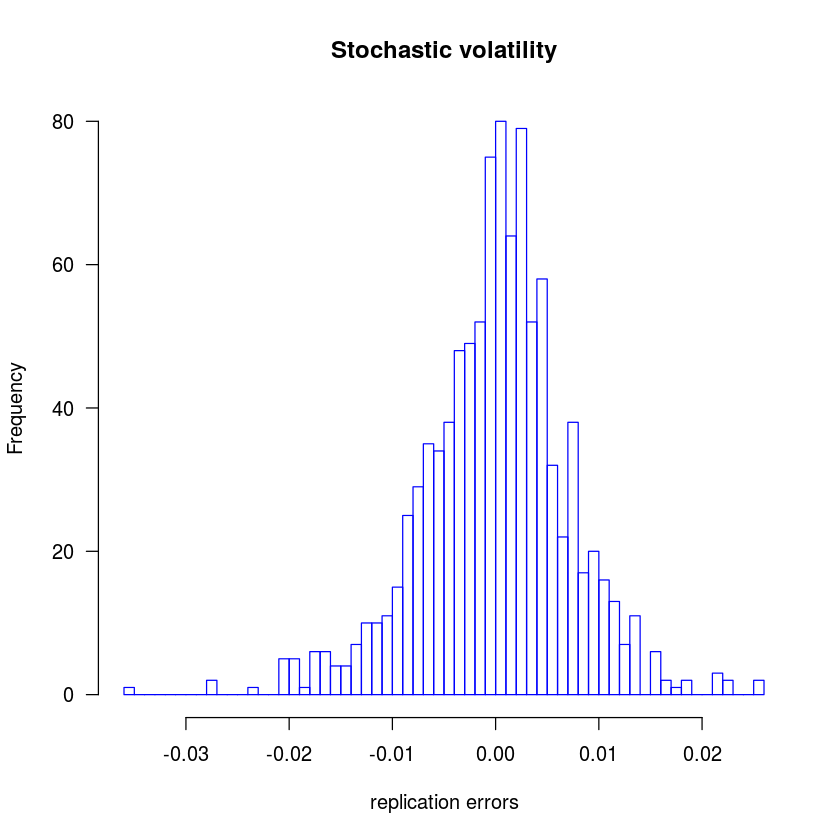

In [8]:
hist(err_sl, 
     main="Stochastic volatility", 
     xlab="replication errors", 
     border="blue", 
     las=1, 
     breaks=50)

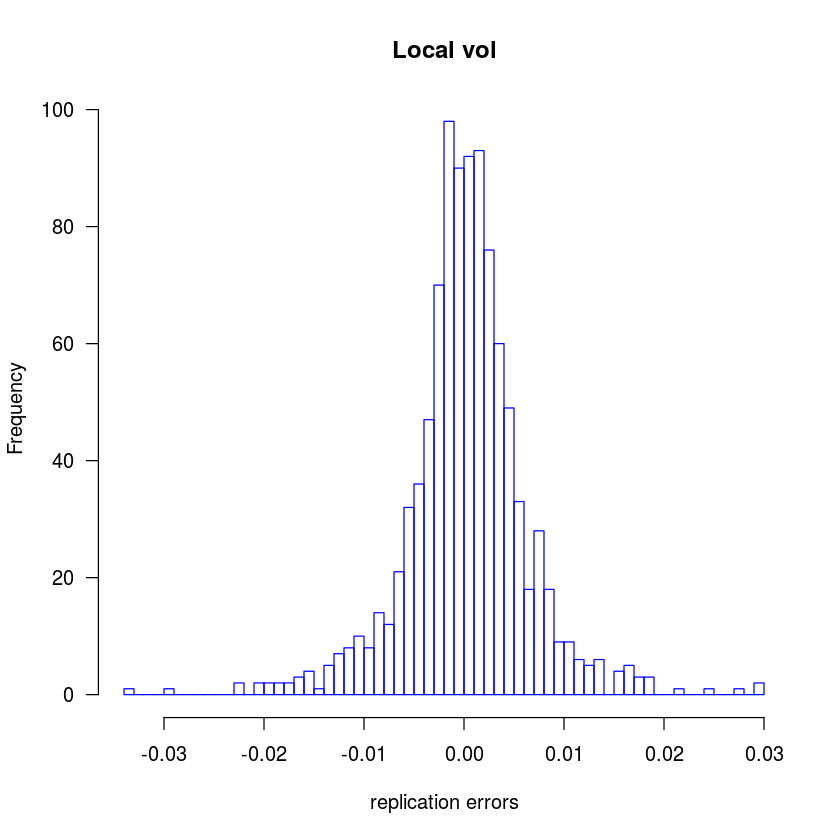

In [9]:
hist(err_Lv_sl, 
     main="Local vol", 
     xlab="replication errors", 
     border="blue", 
     las=1, 
     breaks=50)